In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [419]:
from nilearn import image, plotting
from atlasreader.atlasreader import read_atlas_peak

"""
available reference atlases
---------------------------
    "aal",
    "aicha",
    "desikan_killiany",
    "destrieux",
    "harvard_oxford",
    "juelich",
    "marsatlas",
    "neuromorphometrics",
    "talairach_ba",
    "talairach_gyrus",
 """

atlas = image.threshold_img("HCP_PTN1200/groupICA/groupICA_3T_HCP1200_MSMAll_d100.ica/melodic_IC_sum.nii.gz", "99.5%") 
atlas_coords = plotting.find_probabilistic_atlas_cut_coords(atlas)
brain_region = []
print("BRAIN REGIONS:\n--------------")
for atlas_coord in atlas_coords:
    region = read_atlas_peak("harvard_oxford", atlas_coord)
    print(region)
    brain_region += [region]

BRAIN REGIONS:
--------------
[[62.0, 'Right_Occipital_Pole']]
[[50.0, 'Right_Lateral_Occipital_Cortex_superior_division'], [30.0, 'Right_Angular_Gyrus']]
[[56.0, 'Right_Lateral_Occipital_Cortex_inferior_division'], [14.0, 'Right_Occipital_Pole']]
[[54.0, 'Left_Cuneal_Cortex'], [9.0, 'Right_Cuneal_Cortex']]
[[81.0, 'Left_Supramarginal_Gyrus_anterior_division'], [6.0, 'Left_Supramarginal_Gyrus_posterior_division']]
[[85.0, 'Right_Lateral_Occipital_Cortex_superior_division']]
[[66.0, 'Right_Supramarginal_Gyrus_posterior_division'], [14.0, 'Right_Angular_Gyrus']]
[[68.0, 'Right_Lateral_Occipital_Cortex_superior_division']]
[[72.0, 'Left_Lateral_Occipital_Cortex_superior_division']]
[[49.0, 'Right_Precuneous_Cortex'], [30.0, 'Left_Precuneous_Cortex']]
[[47.0, 'Right_Occipital_Fusiform_Gyrus'], [26.0, 'Right_Lingual_Gyrus']]
[[46.0, 'Left_Angular_Gyrus'], [22.0, 'Left_Supramarginal_Gyrus_posterior_division'], [7.0, 'Left_Lateral_Occipital_Cortex_superior_division']]
[[45.0, 'Left_Lateral_Oc

In [420]:
#select the correct region with largest probability given from the library
brain_region = [
    max(inner_list, key=lambda x: x[0])[-1] if inner_list else None for inner_list in brain_region
]
brain_region

['Right_Occipital_Pole',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Right_Lateral_Occipital_Cortex_inferior_division',
 'Left_Cuneal_Cortex',
 'Left_Supramarginal_Gyrus_anterior_division',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Right_Supramarginal_Gyrus_posterior_division',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Right_Precuneous_Cortex',
 'Right_Occipital_Fusiform_Gyrus',
 'Left_Angular_Gyrus',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Left_Precuneous_Cortex',
 'Right_Occipital_Pole',
 'Right_Intracalcarine_Cortex',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Left_Occipital_Pole',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Left_Postcentral_Gyrus',
 'Left_Superior_Frontal_Gyrus',
 'Right_Supramarginal_Gyrus_anterior_division',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Left_Occipital_Pole',
 'Lef

In [ ]:
open_access_data = pd.read_csv("unrestricted_juzhuoxuan_12_4_2024_1_36_25.csv")
restricted_data = pd.read_csv("RESTRICTED_juzhuoxuan_12_5_2024_14_20_0.csv")
subject_data = open_access_data.merge(restricted_data, how = 'inner', on = 'Subject')

folder = 'HCP_PTN1200/node_timeseries/3T_HCP1200_MSMAll_d100_ts2'
brain_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
brain_data = {}

for filename in brain_files:
    subject_id = int(filename[:6])
    file_path = os.path.join(folder, filename)
    subject_brain_data = np.loadtxt(file_path)
    brain_data[subject_id] = subject_brain_data

brain_data_df = pd.DataFrame({
    'Subject': list(brain_data.keys()),
    'Brain_Data': list(brain_data.values())  # (4800, 100) arrays
})
brain_data_df

data = subject_data.merge(brain_data_df, on='Subject', how='inner')


In [422]:
data.head()

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,SSAGA_Times_Used_Cocaine,SSAGA_Times_Used_Hallucinogens,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used,Brain_Data
0,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,"[[-17.817, 6.4591, 75.159, 63.752, -3.8965, 28..."
1,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,"[[21.753, 3.6099, -23.662, -15.485, 60.84, -18..."
2,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,5.0,5.0,5.0,0.0,0.0,1.0,1.0,2.0,4.0,"[[112.55, -54.284, -51.51, -62.453, 90.959, 95..."
3,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,"[[-113.14, -91.451, -16.406, 13.531, 169.7, -3..."
4,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,"[[-177.94, -107.2, -124.42, -44.5, 5.1172, 15...."


In [423]:
data["Handedness_Cat"] = data["Handedness"].apply(lambda x: "Left" if x < 0 else "Right")

In [424]:
hand_data = data[["Subject", "Gender", "Race", "Handedness", "Handedness_Cat"]]
hand_data

,Subject,Gender,Race,Handedness,Handedness_Cat
0,100206,M,White,65,Right
1,100307,F,White,95,Right
2,100408,M,White,55,Right
3,100610,M,White,85,Right
4,101006,F,Black or African Am.,90,Right
...,...,...,...,...,...
998,992673,F,White,70,Right
999,992774,M,White,100,Right
1000,993675,F,White,85,Right
1001,994273,M,White,60,Right


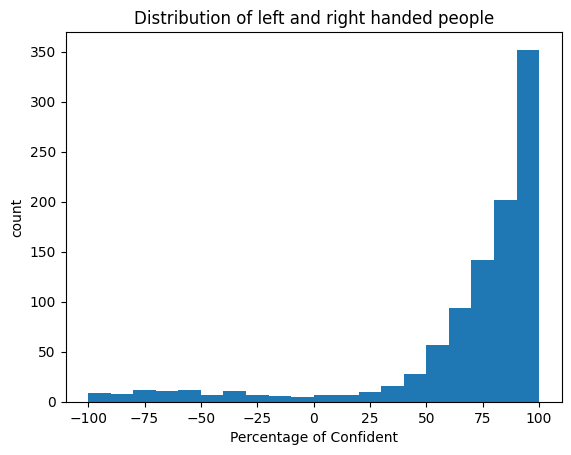

In [425]:
plt.hist(hand_data["Handedness"], bins = 20)
plt.xlabel("Percentage of Confident")
plt.ylabel("count")
plt.title("Distribution of left and right handed people")
plt.show();

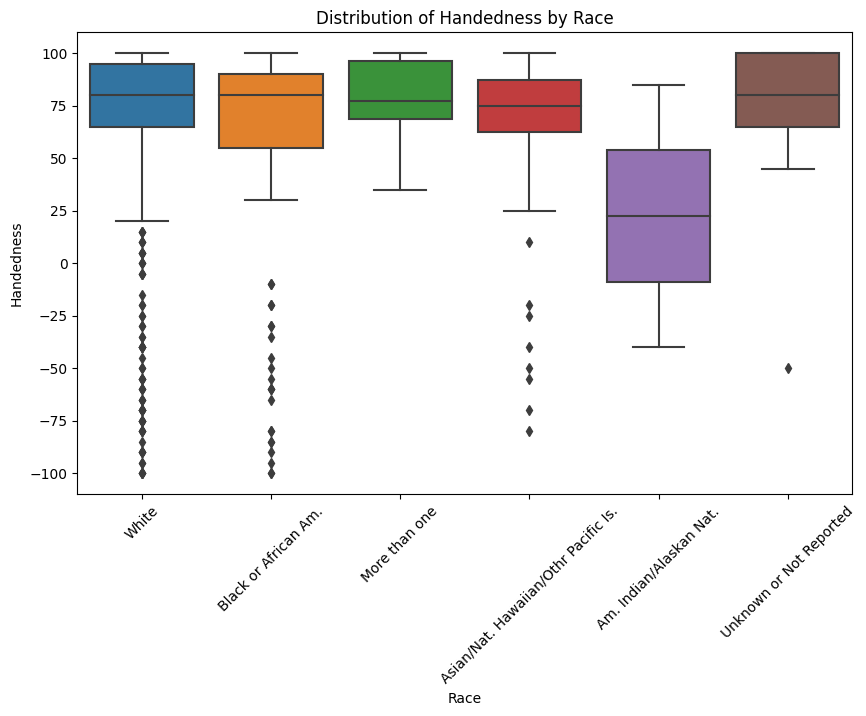

In [337]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=hand_data, x='Race', y='Handedness')
plt.title("Distribution of Handedness by Race")
plt.xlabel("Race")
plt.ylabel("Handedness")
plt.xticks(rotation=45)
plt.show()

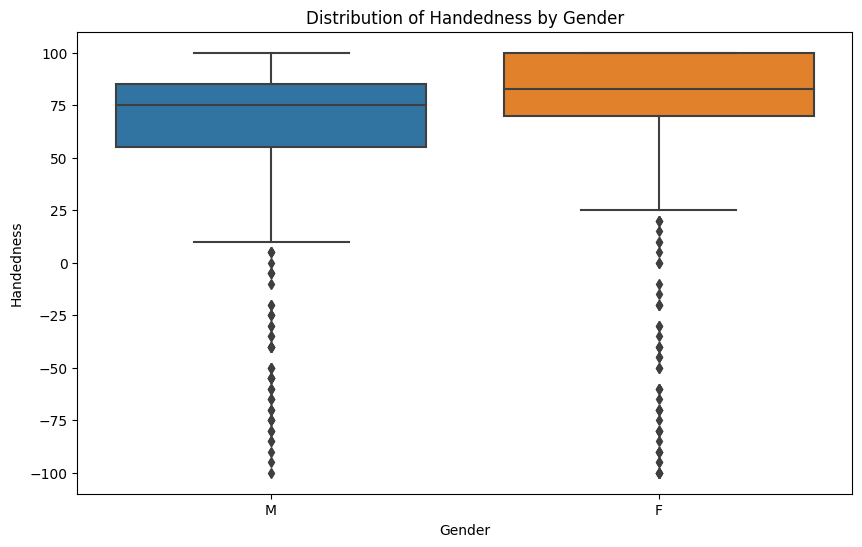

In [338]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=hand_data, x='Gender', y='Handedness')
plt.title("Distribution of Handedness by Gender")
plt.xlabel("Gender")
plt.ylabel("Handedness")
plt.show()

In [69]:
hand_data.groupby(["Gender", "Handedness"])[["Subject"]].count()

Subject
Gender Handedness         
F      -100              5
       -95               2
       -90               4
       -85               1
       -80               4
...                    ...
M       80              70
        85              30
        90              36
        95              26
        100             51

[77 rows x 1 columns]

In [70]:
hand_data.groupby(["Gender", "Handedness_Cat"])[["Subject"]].count()

Subject
Gender Handedness_Cat         
F      Left                 40
       Right               494
M      Left                 48
       Right               421

### Correlation Matrix

#### one example

In [426]:
test_data = data["Brain_Data"][0]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


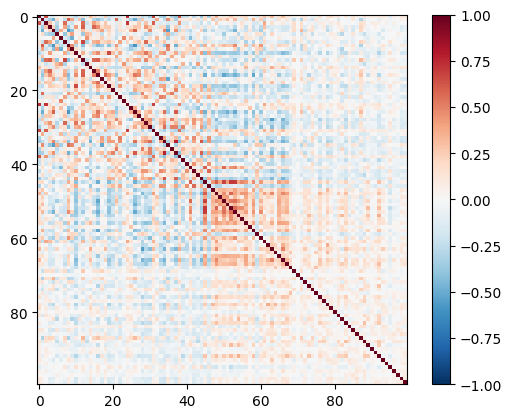

In [427]:
plt.figure()
plt.imshow(np.corrcoef(test_data.T), cmap="RdBu_r", interpolation="none", vmin = -1, vmax = 1)
plt.colorbar()
plt.show()


try for all

In [428]:
correlation_matrix_list = []
for i in range(data.shape[0]):
    person = data["Brain_Data"][i]
    #get matrix
    person_matrix = np.corrcoef(person.T)
    #append to list
    correlation_matrix_list.append(person_matrix)
#append to column
data["correlation_matrix"] = correlation_matrix_list

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


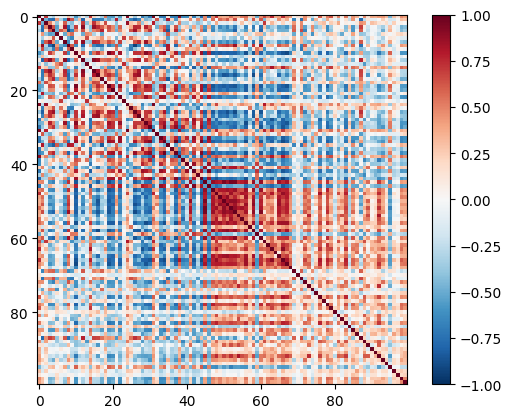

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


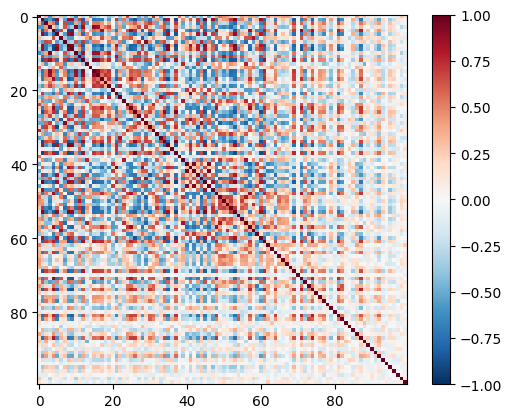

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


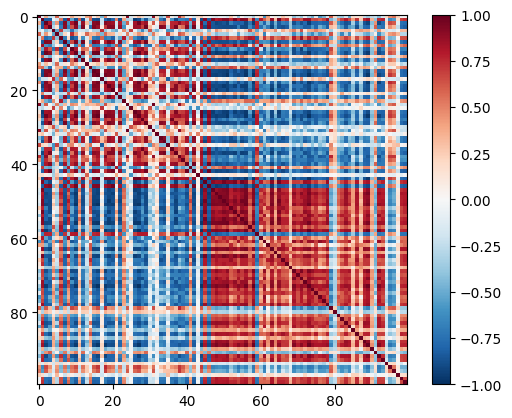

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


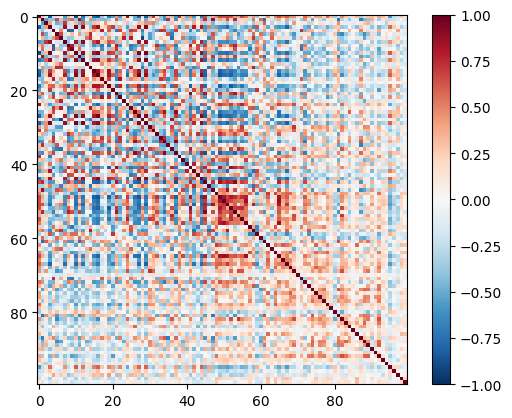

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


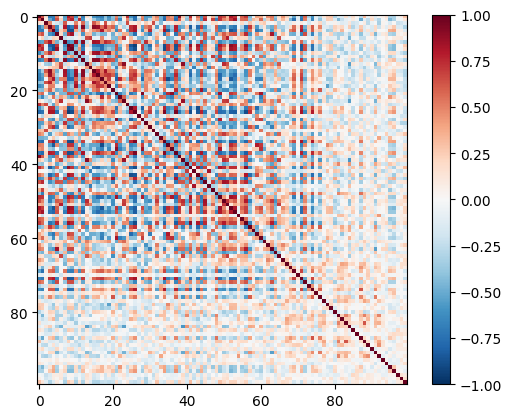

In [429]:
# plot first 5
for i in range(5):
    plt.figure()
    plt.imshow(np.corrcoef(correlation_matrix_list[i].T), cmap="RdBu_r", interpolation="none", vmin = -1, vmax = 1)
    plt.colorbar()
    plt.show()


#### Divided into left and right

In [430]:
left_data = data.loc[data["Handedness_Cat"] == "Left", :]
right_data = data.loc[data["Handedness_Cat"] == "Right", :]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


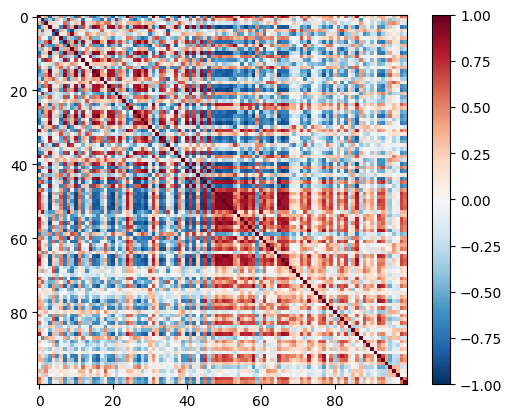

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


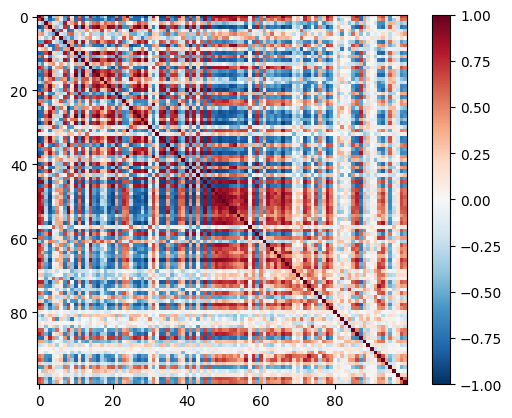

In [431]:
for i in range(2):
    plt.figure()
    plt.imshow(np.corrcoef(left_data["correlation_matrix"].iloc[i].T), cmap="RdBu_r", interpolation="none", vmin = -1, vmax = 1)
    plt.colorbar()
    plt.show()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


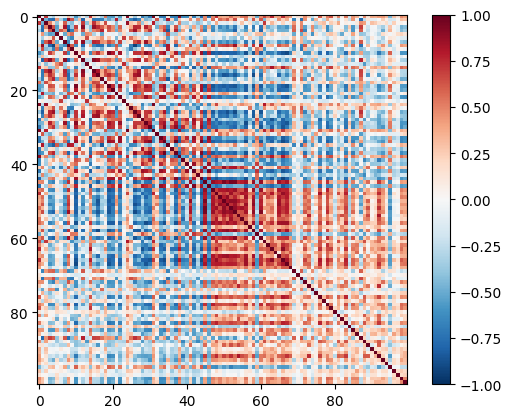

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


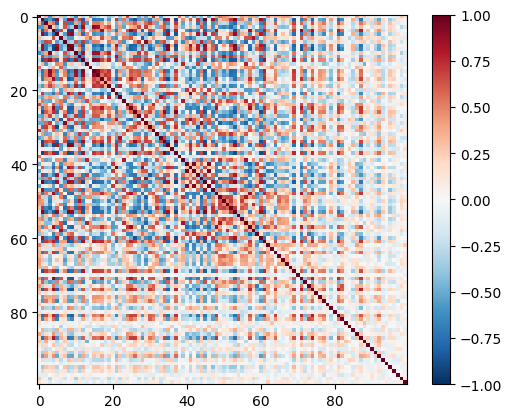

In [432]:
for i in range(2):
    plt.figure()
    plt.imshow(np.corrcoef(right_data["correlation_matrix"].iloc[i].T), cmap="RdBu_r", interpolation="none", vmin = -1, vmax = 1)
    plt.colorbar()
    plt.show()

## For d50

In [376]:
filtered_df = data[(data['Handedness'] > 25) | (data['Handedness'] < -25)]

# Separate into left and right handed
left_handed = filtered_df[filtered_df['Handedness'] < 0]
right_handed = filtered_df[filtered_df['Handedness'] > 0]

# Determine the number of samples to select from the right-handed data
num_samples = min(len(left_handed), len(right_handed))

# Randomly sample from the right-handed data
right_handed_sample = right_handed.sample(n=num_samples, random_state=42)

# Combine the left and right handed data
final_df = pd.concat([left_handed, right_handed_sample])

# Optionally shuffle the final dataframe to mix left and right handed samples
final_df = final_df.sample(frac=1).reset_index(drop=True)

data = final_df

In [377]:
def feature_row_get(target):
    target_index = brain_region.index(target)
    target_row = data['correlation_matrix'].apply(lambda x: x[target_index])
    return target_row

In [378]:
#left 
#MTG.L
    #Right_Planum_Temporale
#ACC.L
    #Left_Superior_Frontal_Gyrus
#MCC.L
    #Left_Precuneous_Cortex
    #Left_Precentral_Gyrus

In [379]:
semi_MTG = feature_row_get("Right_Planum_Temporale")

semi_ACC = feature_row_get("Left_Superior_Frontal_Gyrus")

semi_MCC_1 = feature_row_get("Left_Precuneous_Cortex")
semi_MCC_2 = feature_row_get("Left_Precentral_Gyrus")

In [380]:
#right
#ANG.R
    #Right_Angular_Gyrus
#AMYG.R
    #Left_Thalamus
    #Right_Putamen
    #Right_Caudate
    #Brain-Stem

In [381]:
semi_ANG_1 = feature_row_get("Right_Angular_Gyrus")

semi_AMYG_1 = feature_row_get("Left_Thalamus")
semi_AMYG_2 = feature_row_get("Right_Putamen")
semi_AMYG_3 = feature_row_get("Right_Caudate")
semi_AMYG_4 = feature_row_get("Brain-Stem")


In [382]:
feature_data = data[["Handedness", "Handedness_Cat", "correlation_matrix"]]
feature_data['matrix_mean'] = data['correlation_matrix'].apply(lambda x: np.mean(x))
feature_data["semi_MTG"] = semi_MTG
feature_data["semi_ACC"] = semi_ACC
feature_data["semi_MCC_1"] = semi_MCC_1
feature_data["semi_MCC_2"] = semi_MCC_2

feature_data["semi_ANG_1"] = semi_ANG_1

feature_data["semi_AMYG_1"] = semi_AMYG_1
feature_data["semi_AMYG_2"] = semi_AMYG_2
feature_data["semi_AMYG_3"] = semi_AMYG_3
feature_data["semi_AMYG_4"] = semi_AMYG_4



/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/2270363474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['matrix_mean'] = data['correlation_matrix'].apply(lambda x: np.mean(x))
/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/2270363474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data["semi_MTG"] = semi_MTG
/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/2270363474.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [416]:
def flatten_features(row):
    """
    Given a single row of the DataFrame,
    return a 1D numpy array of all features to be used by the model.
    """
    # Example: Flatten correlation_matrix (if it's a 2D 3x3 matrix, that becomes 9 values)
    corr_mat = np.array(row["correlation_matrix"]).flatten()
    
    # Flatten each 'semi_*' array (each is length 3 in your example)
    semi_MTG = np.array(row["semi_MTG"])
    semi_ACC = np.array(row["semi_ACC"])
    semi_MCC_1 = np.array(row["semi_MCC_1"])
    semi_MCC_2 = np.array(row["semi_MCC_2"])

    semi_ANG_1 = np.array(row["semi_ANG_1"])
    semi_AMYG_1 = np.array(row["semi_AMYG_1"])
    semi_AMYG_2 = np.array(row["semi_AMYG_2"])
    semi_AMYG_3 = np.array(row["semi_AMYG_3"])
    semi_AMYG_4 = np.array(row["semi_AMYG_4"])


    
    # Concatenate them into one array
    all_features = np.concatenate([
        corr_mat,
        semi_MTG, semi_ACC, semi_MCC_1, semi_MCC_2,
        semi_ANG_1, semi_AMYG_1, semi_AMYG_2, semi_AMYG_3, semi_AMYG_4
    ])
    
    return all_features

# Now apply this function to each row in the DataFrame to create your X matrix:
X_list = feature_data.apply(flatten_features, axis=1)
# X_list will be a column of arrays. Convert to a 2D array:
X = np.vstack(X_list.values)

# y is simply the "Handedness" column:
y = feature_data["Handedness"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# Build an SVR pipeline (with feature scaling)
model = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=1.0, epsilon=0.1))
])

# Fit the model
model.fit(X_train, y_train)

# Evaluate on the test set
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
print("R² on the test set:", score)


R² on the test set: -0.363906675796003


In [403]:
y = feature_data["Handedness_Cat"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

model_class = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0))
])
model_class.fit(X_train, y_train)
y_pred = model_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy of SVM Model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy of SVM Model: 0.7
Confusion Matrix:
 [[12  5]
 [ 4  9]]


### Explore for possible features

In [346]:
#correlation matrix

In [434]:
print(brain_region)

['Right_Occipital_Pole', 'Right_Lateral_Occipital_Cortex_superior_division', 'Right_Lateral_Occipital_Cortex_inferior_division', 'Left_Cuneal_Cortex', 'Left_Supramarginal_Gyrus_anterior_division', 'Right_Lateral_Occipital_Cortex_superior_division', 'Right_Supramarginal_Gyrus_posterior_division', 'Right_Lateral_Occipital_Cortex_superior_division', 'Left_Lateral_Occipital_Cortex_superior_division', 'Right_Precuneous_Cortex', 'Right_Occipital_Fusiform_Gyrus', 'Left_Angular_Gyrus', 'Left_Lateral_Occipital_Cortex_superior_division', 'Left_Lateral_Occipital_Cortex_superior_division', 'Left_Precuneous_Cortex', 'Right_Occipital_Pole', 'Right_Intracalcarine_Cortex', 'Right_Lateral_Occipital_Cortex_superior_division', 'Left_Occipital_Pole', 'Left_Lateral_Occipital_Cortex_superior_division', 'Left_Postcentral_Gyrus', 'Left_Superior_Frontal_Gyrus', 'Right_Supramarginal_Gyrus_anterior_division', 'Right_Lateral_Occipital_Cortex_superior_division', 'Left_Occipital_Pole', 'Left_Frontal_Pole', 'Right_S

In [435]:
#left 
#MTG.L
    #Left_Middle_Temporal_Gyrus_posterior_division
#ACC.L
    #Left_Paracingulate_Gyrus
#MCC.L
    #Left_Paracingulate_Gyrus

In [436]:
filtered_df = data[(data['Handedness'] > 25) | (data['Handedness'] < -25)]

# Separate into left and right handed
left_handed = filtered_df[filtered_df['Handedness'] < 0]
right_handed = filtered_df[filtered_df['Handedness'] > 0]

# Determine the number of samples to select from the right-handed data
num_samples = min(len(left_handed), len(right_handed))

# Randomly sample from the right-handed data
right_handed_sample = right_handed.sample(n=num_samples, random_state=42)

# Combine the left and right handed data
final_df = pd.concat([left_handed, right_handed_sample])

# Optionally shuffle the final dataframe to mix left and right handed samples
final_df = final_df.sample(frac=1).reset_index(drop=True)

data = final_df

In [437]:
def feature_row_get(target):
    target_index = brain_region.index(target)
    target_row = data['correlation_matrix'].apply(lambda x: x[target_index])
    return target_row

In [438]:
semi_MTG = feature_row_get("Left_Middle_Temporal_Gyrus_posterior_division")
semi_ACC = feature_row_get("Left_Paracingulate_Gyrus")
semi_MCC = feature_row_get("Left_Paracingulate_Gyrus")

In [360]:
#right
#ANG.R
    #Right_Superior_Parietal_Lobule
    #Right_Supramarginal_Gyrus_posterior_division
    #Right_Supramarginal_Gyrus_anterior_division
#AMYG.R
    #Right_Thalamus
    #Right_Putamen
    #Right_Caudate
    #Right_Hippocampus


In [439]:
semi_ANG_1 = feature_row_get("Right_Superior_Parietal_Lobule")
semi_ANG_2 = feature_row_get("Right_Supramarginal_Gyrus_posterior_division")
semi_ANG_3 = feature_row_get("Right_Supramarginal_Gyrus_anterior_division")

semi_AMYG_1= feature_row_get("Right_Thalamus")
semi_AMYG_2= feature_row_get("Right_Putamen")
semi_AMYG_3= feature_row_get("Right_Caudate")
semi_AMYG_4= feature_row_get("Right_Hippocampus")


In [440]:
feature_data = data[["Handedness", "Handedness_Cat", "correlation_matrix"]]
feature_data['matrix_mean'] = data['correlation_matrix'].apply(lambda x: np.mean(x))
feature_data["semi_MTG"] = semi_MTG
feature_data["semi_ACC"] = semi_ACC
feature_data["semi_MCC"] = semi_MCC

feature_data["semi_ANG_1"] = semi_ANG_1
feature_data["semi_ANG_2"] = semi_ANG_2
feature_data["semi_ANG_3"] = semi_ANG_3

feature_data["semi_AMYG_1"] = semi_AMYG_1
feature_data["semi_AMYG_2"] = semi_AMYG_2
feature_data["semi_AMYG_3"] = semi_AMYG_3
feature_data["semi_AMYG_4"] = semi_AMYG_4



/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/664458372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['matrix_mean'] = data['correlation_matrix'].apply(lambda x: np.mean(x))
/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/664458372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data["semi_MTG"] = semi_MTG
/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/664458372.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

#### SVM with extend feature

##### Score

In [442]:
def flatten_features(row):
    """
    Given a single row of the DataFrame,
    return a 1D numpy array of all features to be used by the model.
    """
    # Example: Flatten correlation_matrix (if it's a 2D 3x3 matrix, that becomes 9 values)
    corr_mat = np.array(row["correlation_matrix"]).flatten()
    
    # Flatten each 'semi_*' array (each is length 3 in your example)
    semi_MTG = np.array(row["semi_MTG"])
    semi_ACC = np.array(row["semi_ACC"])
    semi_MCC = np.array(row["semi_MCC"])
    semi_ANG_1 = np.array(row["semi_ANG_1"])
    semi_ANG_2 = np.array(row["semi_ANG_2"])
    semi_ANG_3 = np.array(row["semi_ANG_3"])
    semi_AMYG_1 = np.array(row["semi_AMYG_1"])
    semi_AMYG_2 = np.array(row["semi_AMYG_2"])
    semi_AMYG_3 = np.array(row["semi_AMYG_3"])
    semi_AMYG_4 = np.array(row["semi_AMYG_4"])

    
    # Concatenate them into one array
    all_features = np.concatenate([
        corr_mat,
        semi_MTG, semi_ACC, semi_MCC,
        semi_ANG_1, semi_ANG_2, semi_ANG_3, semi_AMYG_1, semi_AMYG_2, semi_AMYG_3, semi_AMYG_4
    ])
    
    return all_features

# Now apply this function to each row in the DataFrame to create your X matrix:
X_list = feature_data.apply(flatten_features, axis=1)
# X_list will be a column of arrays. Convert to a 2D array:
X = np.vstack(X_list.values)

# y is simply the "Handedness" column:
y = feature_data["Handedness"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# Build an SVR pipeline (with feature scaling)
model = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=1.0, epsilon=0.1))
])

# Fit the model
model.fit(X_train, y_train)

# Evaluate on the test set
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
print("R² on the test set:", score)


R² on the test set: 0.0009097892186469281


##### class

In [443]:
X.shape

(148, 11000)

In [456]:
y = feature_data["Handedness_Cat"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25
)


model_class = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0))
])
model_class.fit(X_train, y_train)
y_pred = model_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy of SVM Model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy of SVM Model: 0.7027027027027027
Confusion Matrix:
 [[12  7]
 [ 4 14]]
